Data is extracted and r,s,v values are calculated..Transition probabilities are calculated..Using transition probabilities decisions are made whether to buy shares on next or not..optimal buy indices are found based on given condition..return values are calculated using percentage change function..correlation between close and return values are found...All the data is visualized using graph.

Portfolio Value: 17
Transition Probabilities:
  From State 1:
    To State 1: 0.21
    To State -1: 0.12
    To State 0: 0.67
  From State 0:
    To State 0: 0.60
    To State 1: 0.25
    To State -1: 0.15
  From State -1:
    To State 1: 0.11
    To State -1: 0.14
    To State 0: 0.74
Optimal Buy Indices:
[4, 6, 10, 14, 19, 26, 28, 39, 48, 50, 57, 59, 67, 77, 83, 86, 92, 98, 101, 106, 108, 111, 115, 118, 121, 131, 140, 158, 162, 175, 185, 189, 205, 207, 210, 214, 216, 230, 232, 236]
Correlation Matrix:
           Close    Return
Close   1.000000 -0.072259
Return -0.072259  1.000000


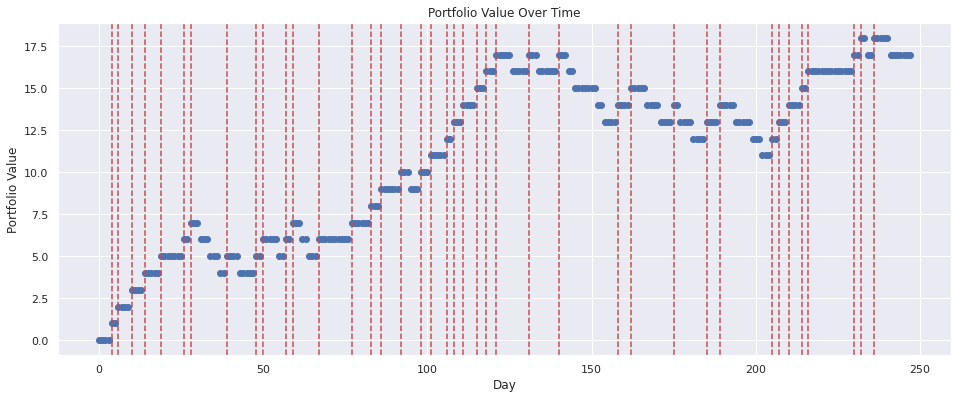

In [42]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

transition_counts = defaultdict(lambda: defaultdict(int))
buy_count = 0
dont_buy_count =0
with open('apple.csv', newline='') as csvfile:
    csvreader = csv.DictReader(csvfile)
    df = pd.read_csv('apple.csv')
    df['Return'] = df['Close'].pct_change()
    first_row = next(csvreader)
    prev_close = float(first_row['Close'])
    decisions = []
    v = 0
    prev_s = None
    optimal_buy_indices = []

    second_row = next(csvreader)
    close = float(second_row['Close'])
    r = (close - prev_close) / prev_close
    prev_close = close
    if r >= 0.01:
        s = 1
    elif -0.01 < r < 0.01:
        s = 0
    else:
        s = -1
    prev_s = s

    transition_counts[prev_s][s] += 1
    
    plt.figure()
    plt.xlabel('Day')
    plt.ylabel('Portfolio Value')
    plt.title('Portfolio Value Over Time')
    plt.grid(True)

    for i, row in enumerate(csvreader):
        close = float(row['Close'])
        r = (close - prev_close) / prev_close
        prev_close = close
        if r >= 0.01:
            s = 1
        elif -0.01 < r < 0.01:
            s = 0
        else:
            s = -1
        
        if prev_s == 0 and s == 1:
            v += 1
            optimal_buy_indices.append(i)
        elif prev_s == 0 and s == -1:
            v -= 1
        
        transition_counts[prev_s][s] += 1
        prev_s = s
        total_transitions = sum(transition_counts[0].values())
        likelihood_of_increase = transition_counts[s][1] / total_transitions if total_transitions > 0 else 0
        likelihood_of_decrease = transition_counts[s][-1] / total_transitions if total_transitions > 0 else 0

        if likelihood_of_increase > likelihood_of_decrease:
            decision = "Buy"
            buy_count +=1 
        else:
            decision = "Don't Buy"
            dont_buy_count +=1
        decisions.append(decision)
        plt.plot(i, v, marker='o', color='b')
    transition_probabilities = defaultdict(dict)
    for current_state, next_states in transition_counts.items():
        total_transitions = sum(next_states.values())
        for next_state, count in next_states.items():
            transition_probabilities[current_state][next_state] = count / total_transitions

print(f"Portfolio Value: {v}")
print("Transition Probabilities:")
for current_state, next_states in transition_probabilities.items():
    print(f"  From State {current_state}:")
    for next_state, probability in next_states.items():
        print(f"    To State {next_state}: {probability:.2f}")

print("Optimal Buy Indices:")
print(optimal_buy_indices)

correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)
for index in optimal_buy_indices:
        plt.axvline(x=index, color='r', linestyle='--')
plt.show()

Printed dates where decision made is to buy

In [38]:
import csv

with open('apple.csv', newline='') as csvfile:
    csvreader = csv.DictReader(csvfile)
    next(csvreader)

    for i, row in enumerate(csvreader):
        if i < len(decisions) and decisions[i] == "Buy":
            print("Date of Buy Decision:", row['Date'])


Date of Buy Decision: 2023-01-11
Date of Buy Decision: 2023-01-13
Date of Buy Decision: 2023-01-17
Date of Buy Decision: 2023-01-18
Date of Buy Decision: 2023-01-20
Date of Buy Decision: 2023-01-23
Date of Buy Decision: 2023-01-24
Date of Buy Decision: 2023-01-25
Date of Buy Decision: 2023-01-26
Date of Buy Decision: 2023-01-27
Date of Buy Decision: 2023-01-30
Date of Buy Decision: 2023-01-31
Date of Buy Decision: 2023-02-01
Date of Buy Decision: 2023-02-02
Date of Buy Decision: 2023-02-03
Date of Buy Decision: 2023-02-06
Date of Buy Decision: 2023-02-07
Date of Buy Decision: 2023-02-08
Date of Buy Decision: 2023-02-09
Date of Buy Decision: 2023-02-10
Date of Buy Decision: 2023-02-13
Date of Buy Decision: 2023-02-14
Date of Buy Decision: 2023-02-15
Date of Buy Decision: 2023-02-16
Date of Buy Decision: 2023-02-17
Date of Buy Decision: 2023-02-21
Date of Buy Decision: 2023-02-22
Date of Buy Decision: 2023-02-23
Date of Buy Decision: 2023-02-24
Date of Buy Decision: 2023-02-27
Date of Bu

In [41]:
import csv

with open('apple.csv', newline='') as csvfile:
    csvreader = csv.DictReader(csvfile)
    next(csvreader)

    for i, row in enumerate(csvreader):
        if i < len(decisions) and i in optimal_buy_indices:
            print(row['Date'],decisions[i])


2023-01-10 Don't Buy
2023-01-12 Don't Buy
2023-01-19 Don't Buy
2023-01-25 Buy
2023-02-01 Buy
2023-02-10 Buy
2023-02-14 Buy
2023-03-02 Don't Buy
2023-03-15 Buy
2023-03-17 Buy
2023-03-28 Buy
2023-03-30 Buy
2023-04-12 Buy
2023-04-26 Buy
2023-05-04 Buy
2023-05-09 Buy
2023-05-17 Buy
2023-05-25 Buy
2023-05-31 Buy
2023-06-07 Buy
2023-06-09 Buy
2023-06-14 Buy
2023-06-21 Buy
2023-06-26 Buy
2023-06-29 Buy
2023-07-14 Buy
2023-07-27 Buy
2023-08-22 Buy
2023-08-28 Buy
2023-09-15 Buy
2023-09-29 Buy
2023-10-05 Buy
2023-10-27 Buy
2023-10-31 Buy
2023-11-03 Buy
2023-11-09 Buy
2023-11-13 Buy
2023-12-04 Buy
2023-12-06 Buy
2023-12-12 Buy


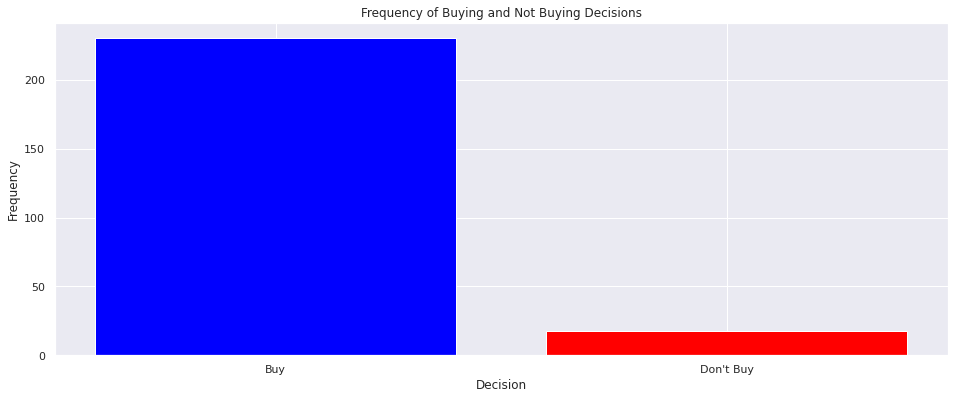

In [43]:
decisions = ['Buy', "Don't Buy"]
counts = [buy_count, dont_buy_count]

plt.bar(decisions, counts, color=['blue', 'red'])
plt.xlabel('Decision')
plt.ylabel('Frequency')
plt.title('Frequency of Buying and Not Buying Decisions')
plt.show()

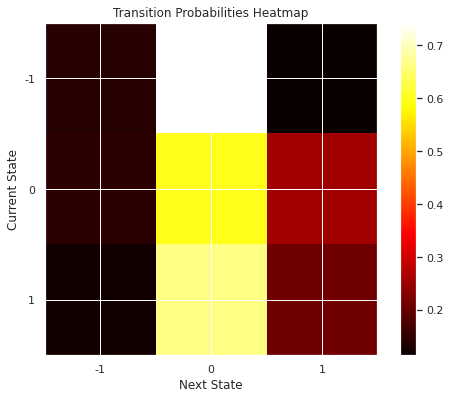

In [19]:
import numpy as np

states = sorted(transition_probabilities.keys())
transition_matrix = np.array([[transition_probabilities[i][j] for j in states] for i in states])

plt.figure(figsize=(8, 6))
plt.imshow(transition_matrix, cmap='hot', interpolation='nearest')

plt.xticks(np.arange(len(states)), states)
plt.yticks(np.arange(len(states)), states)
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.title('Transition Probabilities Heatmap')

plt.colorbar()

plt.show()


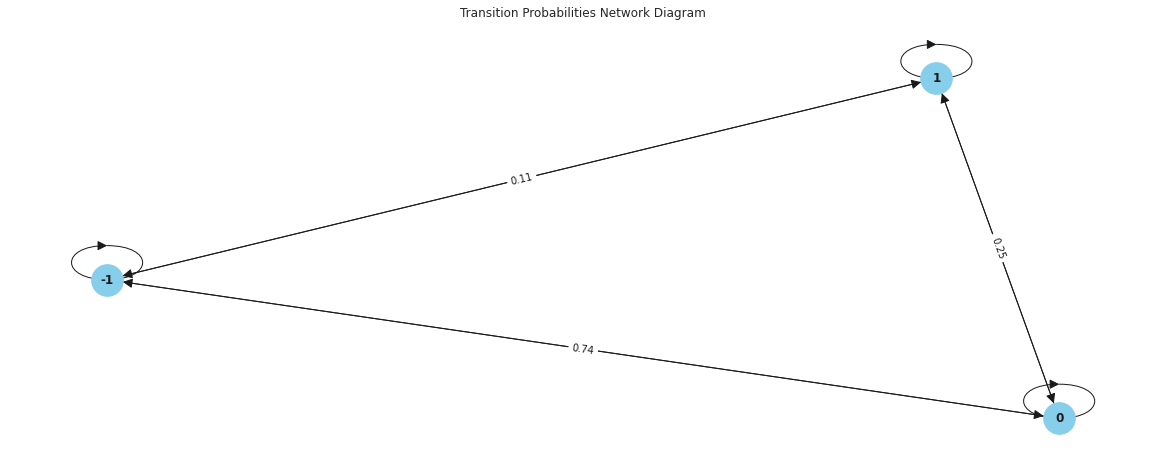

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for state in transition_probabilities.keys():
    G.add_node(state)

for current_state, next_states in transition_probabilities.items():
    for next_state, probability in next_states.items():
        G.add_edge(current_state, next_state, weight=probability)

pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)
edge_labels = {(u, v): f"{p:.2f}" for u, v, p in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Transition Probabilities Network Diagram')
plt.show()


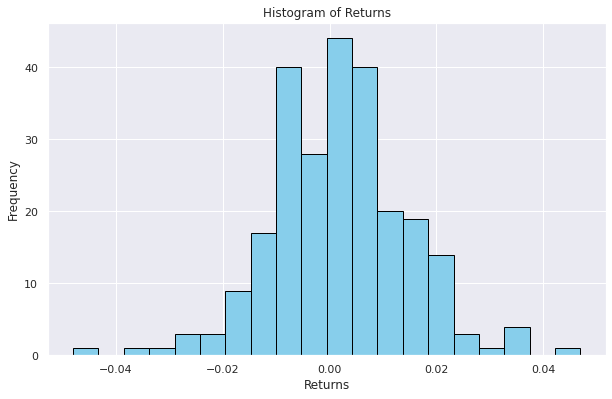

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Return'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Returns')
plt.grid(True)
plt.show()
